In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import scipy.stats as stats
import pingouin as pg

ENTREGA #2

IMPORTACION DE  DATA (importaciones colombia  19,20,21,22) 

In [2]:
df=pd.read_csv(r"C:\Users\ALEXIS\Documents\AXIELS\Documentos Alexis\Estudio\Cursos virtuales\datos y visualizacion MIN-TIC\python\import.csv")
print(df.head(4))

                                        HS2  HS2 ID          Section  \
0                              Live animals     101  Animal Products   
1                       Meat & edible offal     102  Animal Products   
2             Fish, crustaceans, & molluscs     103  Animal Products   
3  Edible products of animal origin, n.e.s.     104  Animal Products   

   Section ID  Trade Value  Year  
0           1   19137801.0  2019  
1           1  386239906.0  2019  
2           1  247651648.0  2019  
3           1  179717234.0  2019  


Verificar información

In [78]:
df.columns


Index(['HS2', 'HS2 ID', 'Section', 'Section ID', 'Trade Value', 'Year'], dtype='object')

Renombre de columnas


In [3]:
df.columns=["Descripcion_de_subpartida","Subpartida","Section","Section ID","Trade Value","Year"]
print(df.head(4))

                  Descripcion_de_subpartida  Subpartida          Section  \
0                              Live animals         101  Animal Products   
1                       Meat & edible offal         102  Animal Products   
2             Fish, crustaceans, & molluscs         103  Animal Products   
3  Edible products of animal origin, n.e.s.         104  Animal Products   

   Section ID  Trade Value  Year  
0           1   19137801.0  2019  
1           1  386239906.0  2019  
2           1  247651648.0  2019  
3           1  179717234.0  2019  


tipos de datos de df

In [80]:
df.dtypes

Descripcion_de_subpartida     object
Subpartida                     int64
Section                       object
Section ID                     int64
Trade Value                  float64
Year                           int64
dtype: object

Valores unicos de "Section"

In [81]:
section=df["Section"].unique()
section


array(['Animal Products', 'Vegetable Products',
       'Animal and Vegetable Bi-Products', 'Foodstuffs',
       'Mineral Products', 'Chemical Products', 'Plastics and Rubbers',
       'Animal Hides', 'Wood Products', 'Paper Goods', 'Textiles',
       'Footwear and Headwear', 'Stone And Glass', 'Precious Metals',
       'Metals', 'Machines', 'Transportation', 'Instruments', 'Weapons',
       'Miscellaneous', 'Arts and Antiques'], dtype=object)

CALCULOS DESCRIPTIVOS

valor maximo  por seccion o capitulo y por año

In [4]:
maximo= df.groupby(["Section","Descripcion_de_subpartida","Year"]).max("Trade Value")
maximo

Subpartida  \
Section       Descripcion_de_subpartida            Year               
Animal Hides  Furskins, articifial fur, & articles 2019         843   
                                                   2020         843   
                                                   2021         843   
                                                   2022         843   
              Leather articles                     2019         842   
...                                                             ...   
Wood Products Straw & esparto manufactures         2022         946   
              Wood, wood articles, & charcoal      2019         944   
                                                   2020         944   
                                                   2021         944   
                                                   2022         944   

                                                         Section ID  \
Section       Descripcion_de_subpartida            Year               
Animal Hides  Furskins, articifial fur, & articles 2019           8   
                                                   2020           8   
                                                   2021           8   
                                                   2022           8   
              Leather articles                     2019           8   
...                                                             ...   
Wood Products Straw & esparto manufactures         2022           9   
              Wood, wood articles, & charcoal      2019           9   
                                                   2020           9   
                                                   2021           9   
                                                   2022           9   

                                                         Trade Value  
Section       Descripcion_de_subpartida            Year               
Animal Hides  Furskins, articifial fur, & articles 2019     345943.0  
                                                   2020     238499.0  
                                                   2021     252838.0  
                                                   2022     202418.0  
              Leather articles                     2019  186075880.0  
...                                                              ...  
Wood Products Straw & esparto manufactures         2022    2954993.0  
              Wood, wood articles, & charcoal      2019  231108399.0  
                                                   2020  203630688.0  
                                                   2021  281588633.0  
                                                   2022  363408445.0  

[384 rows x 3 columns]

primeros 15

In [83]:
maximo.head(15)

Subpartida  \
Section         Descripcion_de_subpartida            Year               
Animal Hides    Furskins, articifial fur, & articles 2019         843   
                                                     2020         843   
                                                     2021         843   
                                                     2022         843   
                Leather articles                     2019         842   
                                                     2020         842   
                                                     2021         842   
                                                     2022         842   
                Raw hides & skin (non-fur)           2019         841   
                                                     2020         841   
                                                     2021         841   
                                                     2022         841   
Animal Products Animal originated products, n.e.s.   2019         105   
                                                     2020         105   
                                                     2021         105   

                                                           Section ID  \
Section         Descripcion_de_subpartida            Year               
Animal Hides    Furskins, articifial fur, & articles 2019           8   
                                                     2020           8   
                                                     2021           8   
                                                     2022           8   
                Leather articles                     2019           8   
                                                     2020           8   
                                                     2021           8   
                                                     2022           8   
                Raw hides & skin (non-fur)           2019           8   
                                                     2020           8   
                                                     2021           8   
                                                     2022           8   
Animal Products Animal originated products, n.e.s.   2019           1   
                                                     2020           1   
                                                     2021           1   

                                                           Trade Value  
Section         Descripcion_de_subpartida            Year               
Animal Hides    Furskins, articifial fur, & articles 2019     345943.0  
                                                     2020     238499.0  
                                                     2021     252838.0  
                                                     2022     202418.0  
                Leather articles                     2019  186075880.0  
                                                     2020  102999091.0  
                                                     2021  134079482.0  
                                                     2022  224707940.0  
                Raw hides & skin (non-fur)           2019   12091658.0  
                                                     2020    5078038.0  
                                                     2021   10451901.0  
                                                     2022   13646911.0  
Animal Products Animal originated products, n.e.s.   2019   12669956.0  
                                                     2020   11094827.0  
                                                     2021   16074541.0

ultimos 15

In [28]:
maximo.tail(15)

Subpartida  Section ID  \
Section       Descripcion_de_subpartida       Year                           
Weapons       Weapons                         2020        1993          19   
                                              2021        1993          19   
                                              2022        1993          19   
Wood Products Cork & cork articles            2019         945           9   
                                              2020         945           9   
                                              2021         945           9   
                                              2022         945           9   
              Straw & esparto manufactures    2019         946           9   
                                              2020         946           9   
                                              2021         946           9   
                                              2022         946           9   
              Wood, wood articles, & charcoal 2019         944           9   
                                              2020         944           9   
                                              2021         944           9   
                                              2022         944           9   

                                                    Trade Value  
Section       Descripcion_de_subpartida       Year               
Weapons       Weapons                         2020   45060043.0  
                                              2021   45913282.0  
                                              2022   49800799.0  
Wood Products Cork & cork articles            2019    1511919.0  
                                              2020    1035402.0  
                                              2021    1339597.0  
                                              2022    1986203.0  
              Straw & esparto manufactures    2019    1741280.0  
                                              2020    1239346.0  
                                              2021    1934294.0  
                                              2022    2954993.0  
              Wood, wood articles, & charcoal 2019  231108399.0  
                                              2020  203630688.0  
                                              2021  281588633.0  
                                              2022  363408445.0

valor minimo de cada capitulo por año

In [5]:
minimo = df.groupby(["Section","Descripcion_de_subpartida","Year"]).min("Trade Value")
minimo

Subpartida  \
Section       Descripcion_de_subpartida            Year               
Animal Hides  Furskins, articifial fur, & articles 2019         843   
                                                   2020         843   
                                                   2021         843   
                                                   2022         843   
              Leather articles                     2019         842   
...                                                             ...   
Wood Products Straw & esparto manufactures         2022         946   
              Wood, wood articles, & charcoal      2019         944   
                                                   2020         944   
                                                   2021         944   
                                                   2022         944   

                                                         Section ID  \
Section       Descripcion_de_subpartida            Year               
Animal Hides  Furskins, articifial fur, & articles 2019           8   
                                                   2020           8   
                                                   2021           8   
                                                   2022           8   
              Leather articles                     2019           8   
...                                                             ...   
Wood Products Straw & esparto manufactures         2022           9   
              Wood, wood articles, & charcoal      2019           9   
                                                   2020           9   
                                                   2021           9   
                                                   2022           9   

                                                         Trade Value  
Section       Descripcion_de_subpartida            Year               
Animal Hides  Furskins, articifial fur, & articles 2019     345943.0  
                                                   2020     238499.0  
                                                   2021     252838.0  
                                                   2022     202418.0  
              Leather articles                     2019  186075880.0  
...                                                              ...  
Wood Products Straw & esparto manufactures         2022    2954993.0  
              Wood, wood articles, & charcoal      2019  231108399.0  
                                                   2020  203630688.0  
                                                   2021  281588633.0  
                                                   2022  363408445.0  

[384 rows x 3 columns]

primero 15 valores

In [84]:
minimo.head(15)

Subpartida  \
Section         Descripcion_de_subpartida            Year               
Animal Hides    Furskins, articifial fur, & articles 2019         843   
                                                     2020         843   
                                                     2021         843   
                                                     2022         843   
                Leather articles                     2019         842   
                                                     2020         842   
                                                     2021         842   
                                                     2022         842   
                Raw hides & skin (non-fur)           2019         841   
                                                     2020         841   
                                                     2021         841   
                                                     2022         841   
Animal Products Animal originated products, n.e.s.   2019         105   
                                                     2020         105   
                                                     2021         105   

                                                           Section ID  \
Section         Descripcion_de_subpartida            Year               
Animal Hides    Furskins, articifial fur, & articles 2019           8   
                                                     2020           8   
                                                     2021           8   
                                                     2022           8   
                Leather articles                     2019           8   
                                                     2020           8   
                                                     2021           8   
                                                     2022           8   
                Raw hides & skin (non-fur)           2019           8   
                                                     2020           8   
                                                     2021           8   
                                                     2022           8   
Animal Products Animal originated products, n.e.s.   2019           1   
                                                     2020           1   
                                                     2021           1   

                                                           Trade Value  
Section         Descripcion_de_subpartida            Year               
Animal Hides    Furskins, articifial fur, & articles 2019     345943.0  
                                                     2020     238499.0  
                                                     2021     252838.0  
                                                     2022     202418.0  
                Leather articles                     2019  186075880.0  
                                                     2020  102999091.0  
                                                     2021  134079482.0  
                                                     2022  224707940.0  
                Raw hides & skin (non-fur)           2019   12091658.0  
                                                     2020    5078038.0  
                                                     2021   10451901.0  
                                                     2022   13646911.0  
Animal Products Animal originated products, n.e.s.   2019   12669956.0  
                                                     2020   11094827.0  
                                                     2021   16074541.0

ultimos 15 valores

In [85]:
minimo.tail(15)

Subpartida  Section ID  \
Section       Descripcion_de_subpartida       Year                           
Weapons       Weapons                         2020        1993          19   
                                              2021        1993          19   
                                              2022        1993          19   
Wood Products Cork & cork articles            2019         945           9   
                                              2020         945           9   
                                              2021         945           9   
                                              2022         945           9   
              Straw & esparto manufactures    2019         946           9   
                                              2020         946           9   
                                              2021         946           9   
                                              2022         946           9   
              Wood, wood articles, & charcoal 2019         944           9   
                                              2020         944           9   
                                              2021         944           9   
                                              2022         944           9   

                                                    Trade Value  
Section       Descripcion_de_subpartida       Year               
Weapons       Weapons                         2020   45060043.0  
                                              2021   45913282.0  
                                              2022   49800799.0  
Wood Products Cork & cork articles            2019    1511919.0  
                                              2020    1035402.0  
                                              2021    1339597.0  
                                              2022    1986203.0  
              Straw & esparto manufactures    2019    1741280.0  
                                              2020    1239346.0  
                                              2021    1934294.0  
                                              2022    2954993.0  
              Wood, wood articles, & charcoal 2019  231108399.0  
                                              2020  203630688.0  
                                              2021  281588633.0  
                                              2022  363408445.0

CALCULOS ESTADISTICOS

In [86]:
newd = df.groupby(["Section"])


In [87]:
resultados = newd['Trade Value'].agg(["mean", "median"]).reset_index
resultados

<bound method DataFrame.reset_index of                                           mean        median
Section                                                     
Animal Hides                      5.751422e+07  1.127178e+07
Animal Products                   1.855283e+08  1.984063e+08
Animal and Vegetable Bi-Products  6.252114e+08  6.027172e+08
Arts and Antiques                 3.352937e+06  3.763374e+06
Chemical Products                 8.627904e+08  5.155781e+08
Foodstuffs                        3.563871e+08  2.231164e+08
Footwear and Headwear             1.340724e+08  3.428801e+07
Instruments                       6.053010e+08  7.029870e+07
Machines                          6.400005e+09  6.414538e+09
Metals                            4.082310e+08  2.015745e+08
Mineral Products                  1.513462e+09  1.683956e+08
Miscellaneous                     3.432850e+08  3.182866e+08
Paper Goods                       3.429748e+08  1.751001e+08
Plastics and Rubbers              1.906714e+09

ENTREGA #3

INFERENCIA ESTADISTICA

Formulación de hipotesis

In [6]:
print(df.groupby(["Descripcion_de_subpartida","Section","Trade Value","Year"]).size())

Descripcion_de_subpartida  Section         Trade Value   Year
Aircraft and spacecraft    Transportation  5.429173e+08  2020    1
                                           1.144176e+09  2021    1
                                           1.209087e+09  2019    1
                                           2.083710e+09  2022    1
Aluminum articles          Metals          3.736860e+08  2020    1
                                                                ..
Wool & animal hair         Textiles        8.631542e+06  2019    1
Zinc articles              Metals          4.959338e+07  2020    1
                                           5.389551e+07  2019    1
                                           6.307166e+07  2021    1
                                           7.400279e+07  2022    1
Length: 384, dtype: int64


In [24]:
df["Year"]=df["Year"].astype(str)
print (df.dtypes)

Descripcion_de_subpartida     object
Subpartida                     int64
Section                       object
Section ID                     int64
Trade Value                  float64
Year                          object
dtype: object


Nivel de importaciones

In [7]:
print(df.groupby(["Section","Trade Value"]).size())

Section        Trade Value
Animal Hides   202418.0       1
               238499.0       1
               252838.0       1
               345943.0       1
               5078038.0      1
                             ..
Wood Products  2954993.0      1
               203630688.0    1
               231108399.0    1
               281588633.0    1
               363408445.0    1
Length: 384, dtype: int64


192     21072925.0
193    482381273.0
194    302200752.0
195    191941482.0
196     16074541.0
          ...     
283     45913282.0
284    454871671.0
285    503556096.0
286    210985239.0
287      1373331.0
Name: Trade Value, Length: 96, dtype: float64


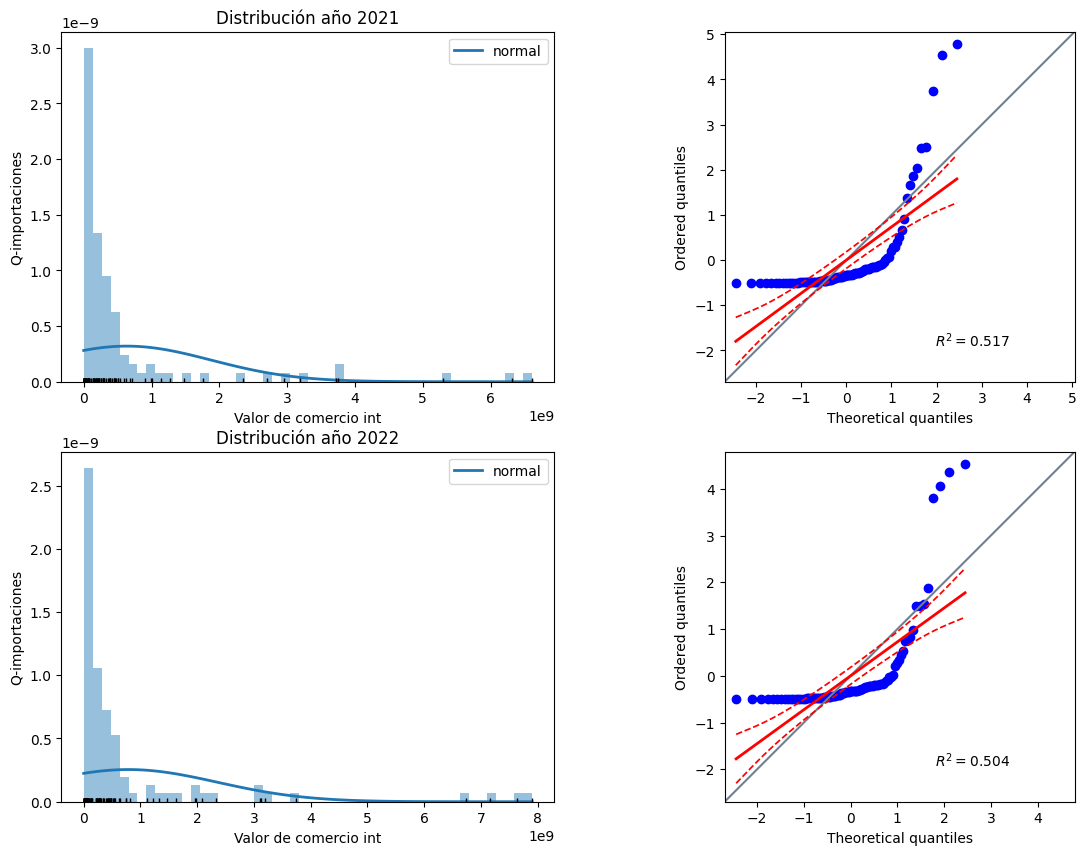

                                   T-test
T                               -0.739412
dof                                   190
alternative                     two-sided
p-val                            0.460569
CI95%        [-557447481.9, 253470690.09]
cohen-d                          0.106725
BF10                                0.202
power                            0.113935


<Figure size 640x480 with 0 Axes>

In [3]:

df=pd.read_csv(r"C:\Users\ALEXIS\Documents\AXIELS\Documentos Alexis\Estudio\Cursos virtuales\datos y visualizacion MIN-TIC\python\import.csv")
df.columns=["Descripcion_de_subpartida","Subpartida","Section","Section ID","Trade Value","Year"]
df["Trade Value"]=df["Trade Value"].astype(str)
#print(df["Trade Value"])

'''
Hipotesis determinar si el valor de importaciones es mayor en 2021 frente al periodo 2022.
'''
fig,axs=plt.subplots(2,2, figsize=(14,10))


#año 2021-----------------------------------------------------------------

nlimpo21= (df.loc[df.Year == 2021,"Trade Value"]).astype(float) 
print(nlimpo21)

mu,sigma=stats.norm.fit(nlimpo21)

x_hat = np.linspace(min(nlimpo21), max(nlimpo21), num=100)
# Calcular y_hat utilizando la distribución normal ajustada
y_hat = stats.norm.pdf(x_hat, mu, sigma)

axs[0,0].plot(x_hat, y_hat, linewidth=2, label='normal')
axs[0,0].hist(nlimpo21, density=True, bins=50, color="#3182bd", alpha=0.5) 
axs[0,0].plot(nlimpo21, np.full_like(nlimpo21, 0), '|k', markeredgewidth=1) 
axs[0,0].set_title("Distribución año 2021")
axs[0,0].set_xlabel('Valor de comercio int')
axs[0,0].set_ylabel('Q-importaciones')
axs[0,0].legend()

#axs[0,0].ticklabel_format(style='plain', axis='both')
# Gráfico de distribución qq-plot
pg.qqplot(nlimpo21, dist='norm', ax=axs[0,1])



#año 2022-----------------------------------------------------------------
nlimpo22= (df.loc[df.Year ==2022,"Trade Value"]).astype(float) 

#valores de la media(mu) y la desviación estandar(sigma)
mu,sigma=stats.norm.fit(nlimpo22)

#sacamos los valores de x, y de nuestra distribución
x_hat=np.linspace(min(nlimpo22),max(nlimpo22),num=100)
y_hat=stats.norm.pdf(x_hat,mu,sigma)

#hacemos el gráfico
axs[1,0].plot(x_hat,y_hat,linewidth=2,label='normal')
axs[1,0].hist(nlimpo22,density=True,bins=50,color="#3182bd", alpha=0.5)
axs[1,0].plot(nlimpo22,np.full_like(nlimpo22,0),'|k',markeredgewidth=1)
axs[1,0].set_title("Distribución año 2022")
axs[1,0].set_xlabel('Valor de comercio int')
axs[1,0].set_ylabel('Q-importaciones')
axs[1,0].legend()

#Gráfico de distribución qq-plot
pg.qqplot(nlimpo22,dist='norm', ax=axs[1,1])
plt.show()
plt.tight_layout()



statics=pg.ttest(nlimpo21,nlimpo22,alternative='two-sided',correction=False)

alfa=0.05
print(statics.T)



GRAFICOS DE (Distribución,Línea de tiempo y Distribución de probabilidad)

In [9]:
section=df["Section"].unique()
section


array(['Animal Products', 'Vegetable Products',
       'Animal and Vegetable Bi-Products', 'Foodstuffs',
       'Mineral Products', 'Chemical Products', 'Plastics and Rubbers',
       'Animal Hides', 'Wood Products', 'Paper Goods', 'Textiles',
       'Footwear and Headwear', 'Stone And Glass', 'Precious Metals',
       'Metals', 'Machines', 'Transportation', 'Instruments', 'Weapons',
       'Miscellaneous', 'Arts and Antiques'], dtype=object)

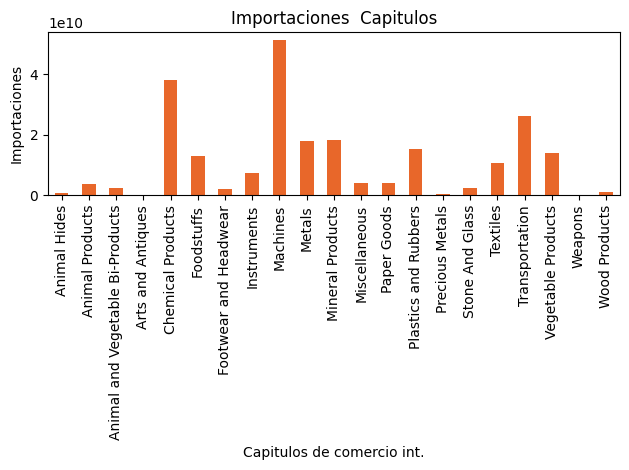

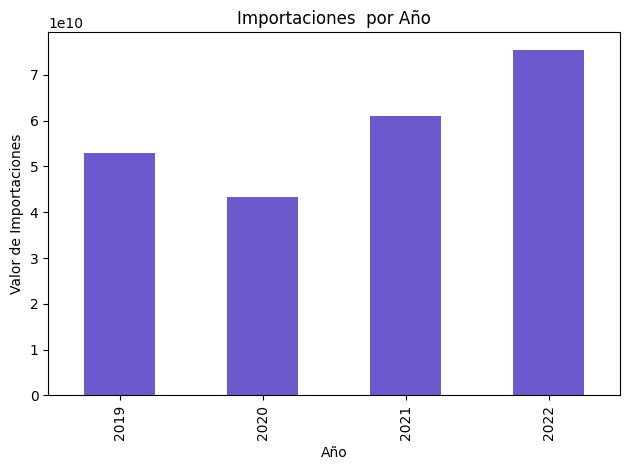

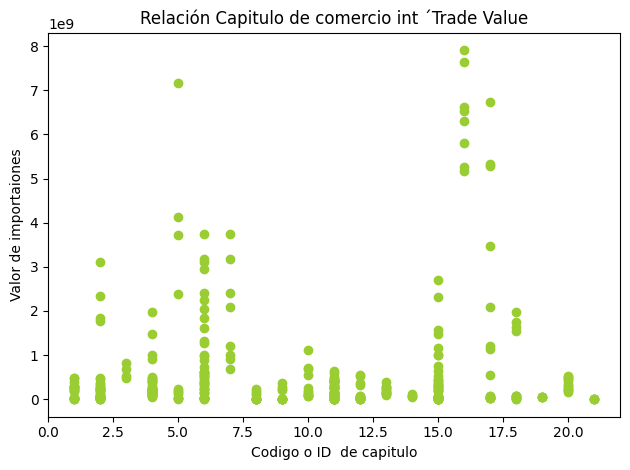

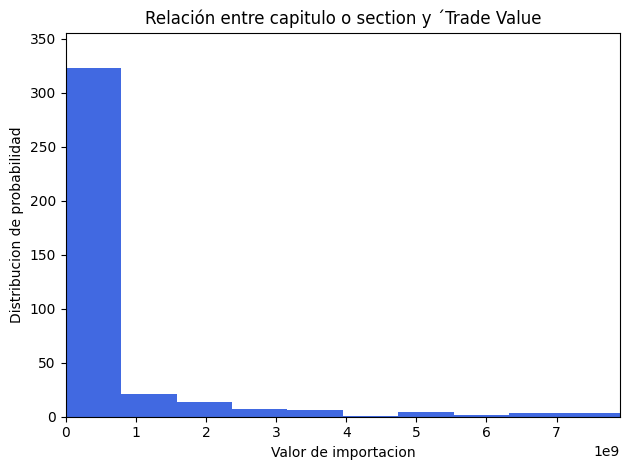

In [4]:

df=pd.read_csv(r"C:\Users\ALEXIS\Documents\AXIELS\Documentos Alexis\Estudio\Cursos virtuales\datos y visualizacion MIN-TIC\python\import.csv", sep=',' , encoding="UTF-8")


#DISTRIBUCION
imp=df.groupby("Section").agg({"Trade Value":"sum"})
imp.plot(kind='bar',legend=None, color="#E8672A")
plt.title('Importaciones  Capitulos') #por esta linea .title el mathplotlib debe ser con .pylot
plt.xlabel('Capitulos de comercio int.')
plt.ylabel('Importaciones')
plt.tight_layout()
plt.show()



#Grafica Linea de Tiempo
ventas_por_fecha=df.groupby("Year").agg({"Trade Value":"sum"})
ventas_por_fecha.plot(kind='bar',legend=None, color= "SlateBlue")
plt.title('Importaciones  por Año')
plt.xlabel('Año')
plt.ylabel('Valor de Importaciones')
plt.tight_layout()
plt.show()

#Gráfico de Dispersión
plt.scatter(df['Section ID'],df['Trade Value'], color="YellowGreen")
plt.title('Relación Capitulo de comercio int ´Trade Value')
plt.xlabel('Codigo o ID  de capitulo')
plt.ylabel('Valor de importaiones')
plt.tight_layout()
plt.show()


#Crear Histograma de Distribución de Probabilidad del Trade value

max_value = df['Trade Value'].max()#Calcular el valor máximo de Trade Value para ajustar los límites del eje x
n, bins, patches =plt.hist(df['Trade Value'],bins=10, color="RoyalBlue")# Crear histograma y obtener los valores de frecuencia (n) y los bordes de los bins (bins)

# Establecer los límites de los ejes
plt.xlim(0, max_value)  # Reemplaza min_x_value y max_x_value por los valores deseados
plt.ylim(0, 1.1*n.max())
plt.title('Relación entre capitulo o section y ´Trade Value')
plt.xlabel('Valor de importacion')
plt.ylabel('Distribucion de probabilidad')
plt.tight_layout()
plt.show()